In [48]:
# FOREST FIRE PREDICTION

In [49]:
# https://builtin.com/data-science/data-science-projects

In [50]:
# https://builtin.com/machine-learning/nearest-neighbor-algorithm

In [51]:
# https://www.analyticsvidhya.com/blog/2021/10/forest-fire-prediction-using-machine-learning/

In [52]:
import datetime as dt

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor

In [53]:
#forest = pd.read_csv('forestfires.csv')

In [54]:
forest = pd.read_csv('fire_archives.csv')

In [55]:
forest.shape

(1674, 14)

In [56]:
forest.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight'],
      dtype='object')

In [57]:
forest.dtypes

latitude      float64
longitude     float64
brightness    float64
scan          float64
track         float64
acq_date       object
acq_time        int64
satellite      object
instrument     object
confidence      int64
version        object
bright_t31    float64
frp           float64
daynight       object
dtype: object

In [58]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1674 entries, 0 to 1673
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    1674 non-null   float64
 1   longitude   1674 non-null   float64
 2   brightness  1674 non-null   float64
 3   scan        1674 non-null   float64
 4   track       1674 non-null   float64
 5   acq_date    1674 non-null   object 
 6   acq_time    1674 non-null   int64  
 7   satellite   1674 non-null   object 
 8   instrument  1674 non-null   object 
 9   confidence  1674 non-null   int64  
 10  version     1674 non-null   object 
 11  bright_t31  1674 non-null   float64
 12  frp         1674 non-null   float64
 13  daynight    1674 non-null   object 
dtypes: float64(7), int64(2), object(5)
memory usage: 183.2+ KB


In [59]:
forest.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,bright_t31,frp
count,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000
mean,43.105213,21.094351,326.180508,1.579462,1.201703,1166.387097,70.261051,303.249707,34.330030
std,2.700031,5.607944,15.241894,0.806218,0.242866,490.173782,19.350341,8.087580,59.999198
min,37.389660,9.934190,300.090000,1.000000,1.000000,9.000000,0.000000,276.280000,3.440000
25%,41.091797,16.186093,317.350000,1.040000,1.020000,935.000000,58.000000,297.225000,11.107500
50%,43.907765,21.660310,325.465000,1.230000,1.100000,1115.000000,73.000000,304.095000,18.540000
75%,44.859403,24.400770,333.362500,1.720000,1.300000,1210.000000,84.000000,309.107500,36.485000
max,48.802190,33.056700,431.760000,4.610000,2.000000,2356.000000,100.000000,321.120000,1598.070000


In [60]:
forest.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,44.276,23.107,302.7,2.1,1.4,2021-07-21,105,Aqua,MODIS,51,6.1NRT,289.0,17.8,N
1,44.373,22.968,340.5,2.1,1.4,2021-07-21,850,Terra,MODIS,91,6.1NRT,299.1,112.9,D
2,44.371,22.995,342.5,2.1,1.4,2021-07-21,850,Terra,MODIS,92,6.1NRT,299.3,120.8,D
3,44.360,22.966,316.2,2.1,1.4,2021-07-21,850,Terra,MODIS,29,6.1NRT,299.4,20.6,D
4,44.370,23.001,335.9,2.1,1.4,2021-07-21,850,Terra,MODIS,88,6.1NRT,297.9,90.1,D


In [61]:
forest.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_12032\2987088346.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(forest.corr(),annot=True,cmap='viridis',linewidths=.5)


<Axes: >

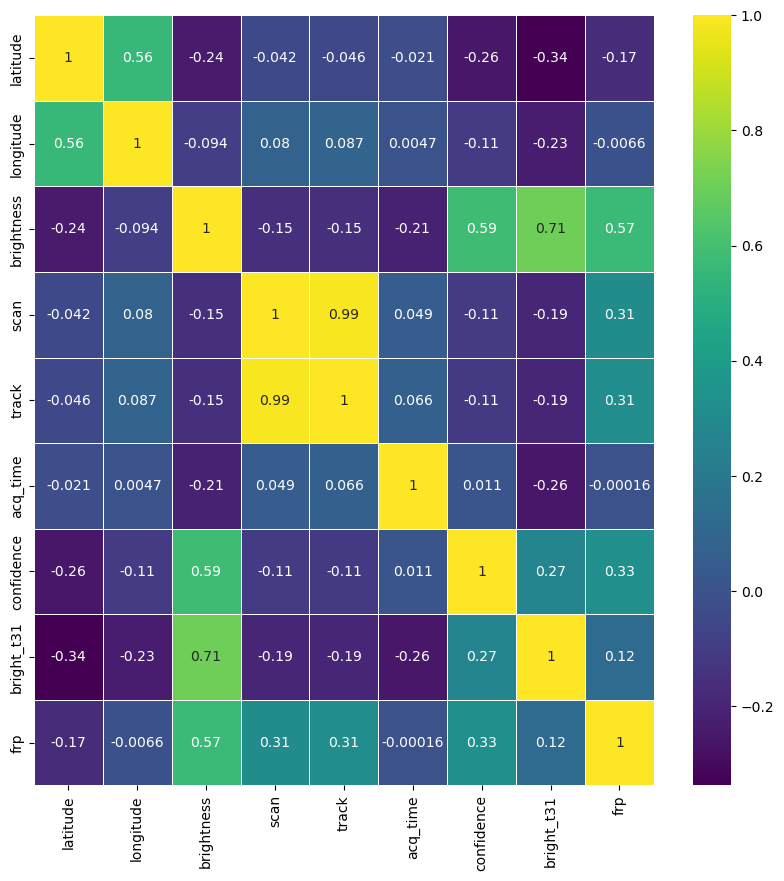

In [62]:
plt.figure(figsize=(10, 10))
sns.heatmap(forest.corr(),annot=True,cmap='viridis',linewidths=.5)

In [63]:
# Data cleaning
forest = forest.drop(['track'], axis = 1)
# Here we are dropping the track column

#Note: By the way from the dataset we are not finding if the forest fire happens or not, 
#we are trying to find the confidence of the forest fire happening.
#They may seem to be the same thing but there is a very small difference between them, try to find that 🙂

In [64]:
# Finding categorical data
print("The scan column")
print(forest['scan'].value_counts())
print()
print("The aqc_time column")
print(forest['acq_time'].value_counts())
print()
print("The satellite column")
print(forest['satellite'].value_counts())
print()
print("The instrument column")
print(forest['instrument'].value_counts())
print()
print("The version column")
print(forest['version'].value_counts())
print()
print("The daynight column")
print(forest['daynight'].value_counts())
print()

The scan column
1.00    125
1.02     98
1.01     94
1.04     69
1.10     68
       ... 
1.52      1
1.94      1
2.17      1
2.52      1
2.40      1
Name: scan, Length: 209, dtype: int64

The aqc_time column
1157    105
1128     62
1208     62
1115     58
941      55
       ... 
126       1
1253      1
1036      1
102       1
1843      1
Name: acq_time, Length: 116, dtype: int64

The satellite column
Terra    883
Aqua     791
Name: satellite, dtype: int64

The instrument column
MODIS    1674
Name: instrument, dtype: int64

The version column
6.1NRT    1674
Name: version, dtype: int64

The daynight column
D    1259
N     415
Name: daynight, dtype: int64



In [65]:
# From the above data, we can see that some columns have just one value recurring in them,
# meaning they are not valuable to us
# So we will drop them altogether.
# Thus only satellite and day-night columns are the only categorical type.

# Having said that, we can even use the scan column to restructure it into a categorical data type column. 
# Which we will be doing in just a while.

In [66]:
forest = forest.drop(['instrument', 'version'], axis = 1)
forest.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight
0,44.276,23.107,302.7,2.1,2021-07-21,105,Aqua,51,289.0,17.8,N
1,44.373,22.968,340.5,2.1,2021-07-21,850,Terra,91,299.1,112.9,D
2,44.371,22.995,342.5,2.1,2021-07-21,850,Terra,92,299.3,120.8,D
3,44.360,22.966,316.2,2.1,2021-07-21,850,Terra,29,299.4,20.6,D
4,44.370,23.001,335.9,2.1,2021-07-21,850,Terra,88,297.9,90.1,D


In [67]:
daynight_map = {"D": 1, "N": 0}
satellite_map = {"Terra": 1, "Aqua": 0}

forest['daynight'] = forest['daynight'].map(daynight_map)
forest['satellite'] = forest['satellite'].map(satellite_map)
forest.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight
0,44.276,23.107,302.7,2.1,2021-07-21,105,0,51,289.0,17.8,0
1,44.373,22.968,340.5,2.1,2021-07-21,850,1,91,299.1,112.9,1
2,44.371,22.995,342.5,2.1,2021-07-21,850,1,92,299.3,120.8,1
3,44.360,22.966,316.2,2.1,2021-07-21,850,1,29,299.4,20.6,1
4,44.370,23.001,335.9,2.1,2021-07-21,850,1,88,297.9,90.1,1


In [68]:
#Binning Method
#Now I mentioned we will be converting scan column to categorical type, we will be doing this using the binning method.
#The range for these columns was 1 to 4.8
bins = [0, 1, 2, 3, 4, 5]
labels = [1,2,3,4,5]
forest['scan_binned'] = pd.cut(forest['scan'], bins=bins, labels=labels)
forest.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,scan_binned
0,44.276,23.107,302.7,2.1,2021-07-21,105,0,51,289.0,17.8,0,3
1,44.373,22.968,340.5,2.1,2021-07-21,850,1,91,299.1,112.9,1,3
2,44.371,22.995,342.5,2.1,2021-07-21,850,1,92,299.3,120.8,1,3
3,44.360,22.966,316.2,2.1,2021-07-21,850,1,29,299.4,20.6,1,3
4,44.370,23.001,335.9,2.1,2021-07-21,850,1,88,297.9,90.1,1,3


In [69]:
# Converting the datatype to datetype from string or NumPy.

In [70]:
# Order_Details['Time'] = pd.to_datetime(Order_Details['Transaction Date'])

In [71]:
forest['acq_date']=pd.to_datetime(forest['acq_date'])

In [72]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1674 entries, 0 to 1673
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   latitude     1674 non-null   float64       
 1   longitude    1674 non-null   float64       
 2   brightness   1674 non-null   float64       
 3   scan         1674 non-null   float64       
 4   acq_date     1674 non-null   datetime64[ns]
 5   acq_time     1674 non-null   int64         
 6   satellite    1674 non-null   int64         
 7   confidence   1674 non-null   int64         
 8   bright_t31   1674 non-null   float64       
 9   frp          1674 non-null   float64       
 10  daynight     1674 non-null   int64         
 11  scan_binned  1674 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(6), int64(4)
memory usage: 145.8 KB


In [73]:
# Order_Details['Hour'] = (Order_Details['Time']).dt.hour

In [74]:
# Now we will be dropping the scan column and handle datetype data – we can extract useful information from these
# datatypes just like we do with categorical data.

forest = forest.drop(['scan'], axis = 1)
# Creating a new column year with the help of acq_date column
forest['year'] = forest['acq_date'].dt.year
forest.head()

,latitude,longitude,brightness,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,scan_binned,year
0,44.276,23.107,302.7,2021-07-21,105,0,51,289.0,17.8,0,3,2021
1,44.373,22.968,340.5,2021-07-21,850,1,91,299.1,112.9,1,3,2021
2,44.371,22.995,342.5,2021-07-21,850,1,92,299.3,120.8,1,3,2021
3,44.360,22.966,316.2,2021-07-21,850,1,29,299.4,20.6,1,3,2021
4,44.370,23.001,335.9,2021-07-21,850,1,88,297.9,90.1,1,3,2021


In [75]:
forest['month'] = forest['acq_date'].dt.month
forest['day'] = forest['acq_date'].dt.day

In [76]:
forest.head()

,latitude,longitude,brightness,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,scan_binned,year,month,day
0,44.276,23.107,302.7,2021-07-21,105,0,51,289.0,17.8,0,3,2021,7,21
1,44.373,22.968,340.5,2021-07-21,850,1,91,299.1,112.9,1,3,2021,7,21
2,44.371,22.995,342.5,2021-07-21,850,1,92,299.3,120.8,1,3,2021,7,21
3,44.360,22.966,316.2,2021-07-21,850,1,29,299.4,20.6,1,3,2021,7,21
4,44.370,23.001,335.9,2021-07-21,850,1,88,297.9,90.1,1,3,2021,7,21


In [78]:
forest.shape

(1674, 14)

In [80]:
# Separating our target variable
y = forest['confidence']
fin = forest.drop(['confidence', 'acq_date', 'acq_time', 'bright_t31'], axis = 1)

In [81]:
fin.columns

Index(['latitude', 'longitude', 'brightness', 'satellite', 'frp', 'daynight',
       'scan_binned', 'year', 'month', 'day'],
      dtype='object')

C:\Users\DELL\AppData\Local\Temp\ipykernel_12032\1030454431.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(fin.corr(),annot=True,cmap='viridis',linewidths=.5)


<Axes: >

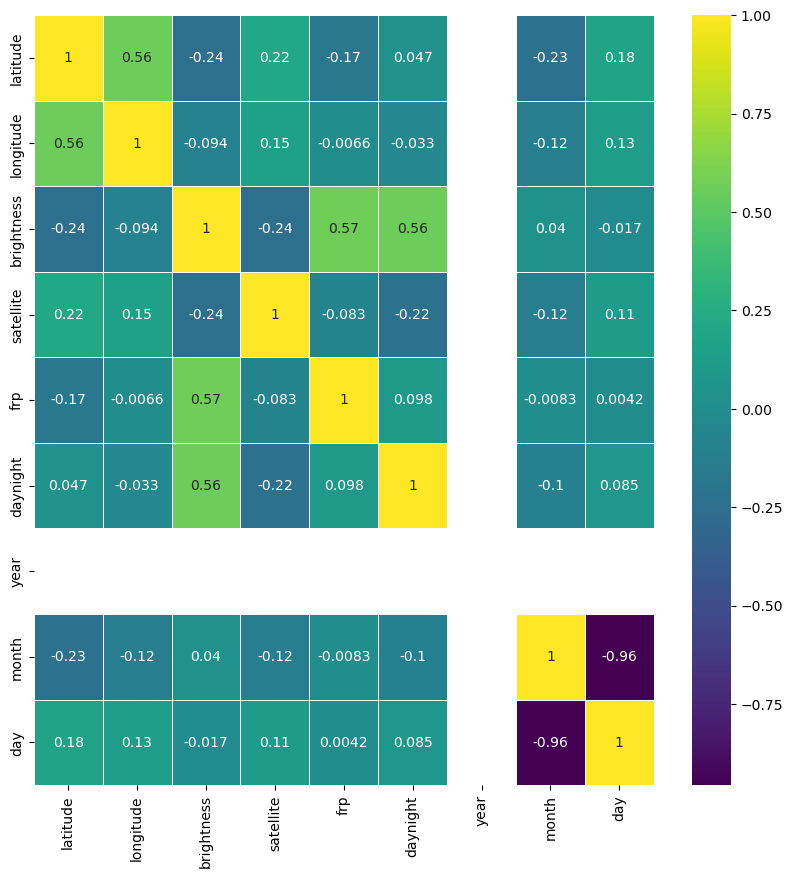

In [82]:
# Checking for correlation once again
plt.figure(figsize=(10, 10))
sns.heatmap(fin.corr(),annot=True,cmap='viridis',linewidths=.5)

In [83]:
# Let’s see our cleaned and sorted dataset now

fin.head()

,latitude,longitude,brightness,satellite,frp,daynight,scan_binned,year,month,day
0,44.276,23.107,302.7,0,17.8,0,3,2021,7,21
1,44.373,22.968,340.5,1,112.9,1,3,2021,7,21
2,44.371,22.995,342.5,1,120.8,1,3,2021,7,21
3,44.360,22.966,316.2,1,20.6,1,3,2021,7,21
4,44.370,23.001,335.9,1,90.1,1,3,2021,7,21


In [84]:
# Splitting the clean data into training and testing dataset
Xtrain, Xtest, ytrain, ytest = train_test_split(fin.iloc[:, :500], y, test_size=0.2)

In [85]:
Xtrain.shape

(1339, 10)

In [86]:
Xtest.shape

(335, 10)

In [87]:
ytrain.shape

(1339,)

In [88]:
ytest.shape

(335,)

In [89]:
#Model building
# Using RandomForestRegressor for model building
random_model = RandomForestRegressor(n_estimators=300, random_state = 42, n_jobs = -1)
#Fit
random_model.fit(Xtrain, ytrain)

y_pred = random_model.predict(Xtest)

#Checking the accuracy
random_model_accuracy = round(random_model.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy, 2), '%')

96.24 %


In [90]:
# Checking the accuracy
random_model_accuracy1 = round(random_model.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy1, 2), '%')

75.71 %


In [91]:
# Saving the model by pickle module using the serialized format
import pickle 
saved_model = pickle.dump(random_model, open('ForestModelOld.pickle','wb'))

In [92]:
# Model Tuning
# The accuracy is not so great, plus the model is overfitting
# So we use RandomCV
# Getting all the parameters from the model

random_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [93]:
#Putting RadomizedSearchCV in action!

"""
n_estimators = number of trees in the forest
max_features = max number of features considered for splitting a node
max_depth = max number of levels in each decision tree
min_samples_split = min number of data points placed in a node before the node is split
min_samples_leaf = min number of data points allowed in a leaf node
bootstrap = method for sampling data points (with or without replacement)
"""

In [97]:
from sklearn.model_selection import RandomizedSearchCV
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 500, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(15, 35, num = 7)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                }
print(random_grid)

{'n_estimators': [300, 310, 321, 331, 342, 352, 363, 373, 384, 394, 405, 415, 426, 436, 447, 457, 468, 478, 489, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [15, 18, 21, 25, 28, 31, 35, None], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 2, 4]}


In [98]:
# A random search of parameters, using 3 fold cross-validation, 
# search across 100 different combinations and use all available cores
# n_iter, which controls the number of different combinations to try, 
# and cv which is the number of folds to use for cross-validation
rf_random = RandomizedSearchCV(estimator = random_model, param_distributions = random_grid, 
                                n_iter = 50, cv = 3, verbose=2, random_state=42)
# Fit the random search model
rf_random.fit(Xtrain, ytrain)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=415; total time=   0.9s
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=415; total time=   0.0s
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=415; total time=   0.0s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=436; total time=   0.0s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=436; total time=   0.0s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=436; total time=   0.0s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=478; total time=  38.2s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=47

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=394; total time=   2.0s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=457; total time=   2.0s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=457; total time=   2.0s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=457; total time=   2.5s
[CV] END max_depth=28, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=489; total time=   1.6s
[CV] END max_depth=28, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=489; total time=   1.5s
[CV] END max_depth=28, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=489; total time=   1.7s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=478; total time=   0.0s
[CV] END max_depth=28, max_features=auto

[CV] END max_depth=31, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=394; total time=   1.8s
[CV] END max_depth=31, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=331; total time=   0.0s
[CV] END max_depth=31, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=331; total time=   0.0s
[CV] END max_depth=31, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=331; total time=   0.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=468; total time=   3.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=468; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=468; total time=   1.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=468; total time=   0.0s
[CV] END max_depth=None, max_features=

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
84 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
84 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\DELL\anaconda3\lib\site-packages\skle

RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_estimators=300, n_jobs=-1,
                                                   random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': [15, 18, 21, 25, 28, 31,
                                                      35, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [300, 310, 321, 331,
                                                         342, 352, 363, 373,
                                                         384, 394, 405, 415,
                                                         426, 436, 447, 457,
                                                         468, 478, 489, 500]},
                   random_state=42, verbose=2)

In [99]:
# Just like this snippet, there will be numerous folds in this RandomizedSearchCV

# Getting the best parameter out of it

rf_random.best_params_

{'n_estimators': 394,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [100]:
# Creating a new model with tuned parameters

random_new = RandomForestRegressor(n_estimators = 394, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt',
                                      max_depth = 25, bootstrap = True)

In [101]:
#Fit
random_new.fit(Xtrain, ytrain)
y_pred1 = random_new.predict(Xtest)
#Checking the accuracy
random_model_accuracy1 = round(random_new.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy1, 2), '%')


96.16 %


In [102]:
# Checking the accuracy

random_model_accuracy2 = round(random_new.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy2, 2), '%')

73.6 %


#Saving the tuned model by pickle module using the serialized format

saved_model = pickle.dump(random_new, open('ForestModel.pickle','wb'))
#Loading the tuned pickled model

reg_from_pickle = pickle.load(saved_model)